<a href="https://colab.research.google.com/github/Kevin-Yau/CHL5230/blob/main/Datathon_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [41]:
# Read the dataset into a Pandas DataFrame
df = pd.read_csv('datathon4.csv')

In [42]:
# read dataset
ICU_df = pd.read_csv('datathon4.csv')
ICU_df.head()

# check dimension of the dataset
print(ICU_df.shape)

# list the columns of the dataframe
print(ICU_df.columns)

(91713, 186)
Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)


In [43]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [44]:
# Display summary statistics
print(df.describe())

        encounter_id     patient_id   hospital_id  hospital_death  \
count   91713.000000   91713.000000  91713.000000    91713.000000   
mean    65606.079280   65537.131464    105.669262        0.086302   
std     37795.088538   37811.252183     62.854406        0.280811   
min         1.000000       1.000000      2.000000        0.000000   
25%     32852.000000   32830.000000     47.000000        0.000000   
50%     65665.000000   65413.000000    109.000000        0.000000   
75%     98342.000000   98298.000000    161.000000        0.000000   
max    131051.000000  131051.000000    204.000000        1.000000   

                age           bmi  elective_surgery        height  \
count  87485.000000  88284.000000      91713.000000  90379.000000   
mean      62.309516     29.185818          0.183736    169.641588   
std       16.775119      8.275142          0.387271     10.795378   
min       16.000000     14.844926          0.000000    137.200000   
25%       52.000000     23.641975

In [ ]:
# Display summary statistics
df['heart_rate_apache'].describe()

count    90835.000000
mean        99.707932
std         30.870502
min         30.000000
25%         86.000000
50%        104.000000
75%        120.000000
max        178.000000
Name: heart_rate_apache, dtype: float64

In [ ]:
# Display summary statistics
df[['weight','readmission_status','albumin_apache','apache_2_diagnosis','apache_3j_diagnosis','apache_post_operative','arf_apache','bilirubin_apache','bun_apache','creatinine_apache','fio2_apache','gcs_eyes_apache','gcs_motor_apache','gcs_unable_apache','gcs_verbal_apache']].describe()



,weight,readmission_status,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache
count,88993.000000,91713.0,37334.000000,90051.000000,90612.000000,91713.000000,90998.000000,33579.000000,72451.00000,72860.000000,20845.000000,89812.000000,89812.000000,90676.000000,89812.000000
mean,84.028340,0.0,2.902968,185.401739,558.216377,0.201106,0.027979,1.147721,25.82533,1.480014,0.595751,3.465049,5.471195,0.009528,3.994778
std,25.011497,0.0,0.681863,86.050882,463.266985,0.400829,0.164912,2.165538,20.67298,1.525787,0.263238,0.951715,1.288376,0.097148,1.560166
min,38.600000,0.0,1.200000,101.000000,0.010000,0.000000,0.000000,0.100000,4.00000,0.300000,0.210000,1.000000,1.000000,0.000000,1.000000
25%,66.800000,0.0,2.400000,113.000000,203.010000,0.000000,0.000000,0.400000,13.00000,0.720000,0.400000,3.000000,6.000000,0.000000,4.000000
50%,80.300000,0.0,2.900000,122.000000,409.020000,0.000000,0.000000,0.600000,19.00000,0.980000,0.500000,4.000000,6.000000,0.000000,5.000000
75%,97.100000,0.0,3.400000,301.000000,703.030000,0.000000,0.000000,1.100000,32.00000,1.530000,0.850000,4.000000,6.000000,0.000000,5.000000
max,186.000000,0.0,4.600000,308.000000,2201.050000,1.000000,1.000000,51.000000,127.00000,11.180000,1.000000,4.000000,6.000000,1.000000,5.000000


In [45]:
# check missing value
print(ICU_df.isnull().sum())

encounter_id                      0
patient_id                        0
hospital_id                       0
hospital_death                    0
age                            4228
                               ... 
leukemia                        715
lymphoma                        715
solid_tumor_with_metastasis     715
apache_3j_bodysystem           1662
apache_2_bodysystem            1662
Length: 186, dtype: int64


In [46]:
# importing PyTorch library as 't' for convenience
import torch as t

# importing other necessary libraries
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# importing PyTorch modules for building neural networks
from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout


In [ ]:
# Defining the input to the neuron - a single example with 3 features
X = np.array([
    [0, 1, 2]
])

# Defining the expected output for the given input
Y = np.array([
    [1]
])

In [ ]:
# Initializing the weights randomly for 3 inputs and 1 output
W = t.randn((3,1))
print(W)
print(W.dtype) # Checking the data type of the weights tensor
print(W.shape) # Checking the shape of the weights tensor
print('===========')

# Initializing the bias as a tensor with a single zero element
B = t.zeros((1,1))
print(B)
print(B.dtype) # Checking the data type of the bias tensor
print(B.shape) # Checking the shape of the bias tensor

tensor([[ 2.0402],
        [-1.8448],
        [ 1.0779]])
torch.float32
torch.Size([3, 1])
tensor([[0.]])
torch.float32
torch.Size([1, 1])


In [ ]:
# Converting the input array to a PyTorch Tensor and performing matrix multiplication with the weights
XW = t.Tensor(X) @ W
print(XW)

# Adding the bias to the result of the matrix multiplication
XW_B = XW + B
print(XW_B)

tensor([[0.3111]])
tensor([[0.3111]])


In [ ]:
# Applying the hyperbolic tangent activation function element-wise to the result
output = tanh(XW_B)
print(output)

tensor([[0.3014]])


In [ ]:
# Calculating the Mean Squared Error (MSE) loss between the predicted output and the actual output
loss = t.nn.functional.mse_loss(output, t.Tensor(Y))
print(loss)

tensor(0.4880)


In [ ]:
# Defining multiple inputs for batch processing
X = t.Tensor([
    # A batch of examples with 3 features each
    [0, 5, 2],
    [0, 3, 4],
    # ...
]).type(t.float32)

# Defining the expected outputs for the batch of inputs (for a binary classification problem)
Y = t.Tensor([
    # Corresponding expected outputs (labels)
    [1],
    [1],
    # ...
]).type(t.float32)

# Initializing weights and bias with the requirement to compute gradients (for learning during training)
W = t.randn((3,1), requires_grad=True)
B = t.zeros((1,1), requires_grad=True).type(t.float32)

# Defining the loss function for binary classification (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

# Setting up the optimizer (Adam) with the parameters to optimize (weights and bias) and the learning rate
learning_rate = 1
optimizer = Adam([W, B], lr=learning_rate)

# Defining the number of iterations for training and a list to keep track of loss values
number_of_iterations = 100
loss_list = []
for _ in range(number_of_iterations):

    # Forward pass: computing the predicted output using the sigmoid activation function
    out = sigmoid(X @ W  + B)

    # Calculating the loss
    loss = loss_fn(out.view(-1), Y.view(-1))

    # Recording the loss value for visualization
    loss_list.append(loss.item())

    # Clearing previous gradients before the backward pass
    optimizer.zero_grad()

    # Backward pass: computing gradients
    loss.backward()

    # Updating the weights and bias based on the gradients computed
    optimizer.step()

# Printing the probabilities predicted by the neuron for each input
print(sigmoid(X @ W  + B))

tensor([[1.],
        [1.]], grad_fn=<SigmoidBackward0>)


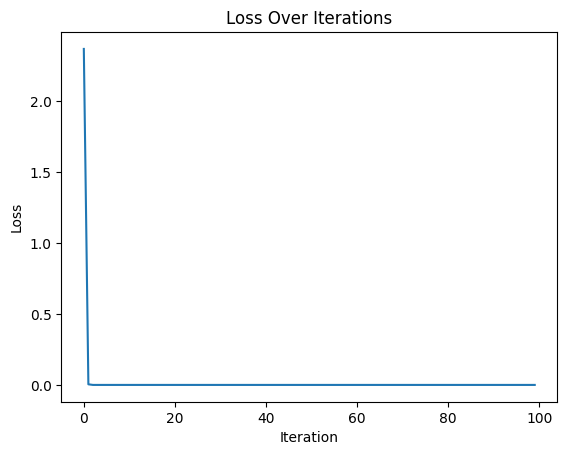

In [ ]:
# Plotting the loss values recorded during training
plt.plot([i for i in range(len(loss_list))], loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Over Iterations')
plt.show()


In [ ]:
!pip install torch

# importing torch as t
import torch as t
import numpy as np
from torch.nn.functional import sigmoid, relu, tanh
from torch.optim import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

from torch.nn import Tanh, Linear, Sequential, Sigmoid, Dropout

In [47]:
# checking the data types
ICU_df.dtypes

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                            float64
                                ...   
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
Length: 186, dtype: object

In [ ]:
ICU_df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [ ]:
ICU_df['hospital_death'].mean()

0.08630183289173836

In [48]:
# Display unique values in 'ethnicity' column
print(ICU_df['ethnicity'].unique())

['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']


In [ ]:
ICU_df= ICU_df.drop('encounter_id', axis=1)

In [50]:
# Display unique values in 'ethnicity' column
print(ICU_df['icu_admit_source'].unique())

['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU' nan]


In [51]:
ICU_df['gender'].replace({'F' : 1, 'M' : 0}, inplace=True)


In [52]:


!pip install category_encoders

import pandas as pd
import numpy as np
import warnings
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
# from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import plotly.express as px
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


warnings.filterwarnings('ignore')


from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
# from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import plotly.express as px
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV



array(['Floor', 'Accident & Emergency', 'Operating Room / Recovery',
       'Other Hospital', 'Other ICU', nan], dtype=object)

In [60]:
# List of columns that contain categorical data
target_column = 'hospital_death'
categorical_columns = ['icu_admit_source','icu_stay_type','icu_type','apache_2_diagnosis','apache_3j_diagnosis','apache_3j_bodysystem','apache_2_bodysystem']

# List of columns that contain numerical data (excluding categorical columns and the target column)
numerical_columns = [c for c in ICU_df.columns if c not in categorical_columns and c != target_column]

# Display the unique values in the 'icu_admit_source' column
ICU_df['icu_admit_source'].unique()


array(['Floor', 'Accident & Emergency', 'Operating Room / Recovery',
       'Other Hospital', 'Other ICU', nan], dtype=object)

In [53]:
ICU_df['icu_type'].unique()

array(['CTICU', 'Med-Surg ICU', 'CCU-CTICU', 'Neuro ICU', 'MICU', 'SICU',
       'Cardiac ICU', 'CSICU'], dtype=object)

In [61]:
# Initializing a column transformer that will handle categorical data encoding
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [c for c in categorical_columns]),
                        ('target_encoder', TargetEncoder(),)],
                       remainder='passthrough')

In [62]:
# Randomly sample 70% of the data for training
train_data = ICU_df.sample(frac = .7, random_state=10)

# Use the remaining 30% for testing
test_data = ICU_df.drop(train_data.index)

# Check the mean of the 'hospital_death' column in both training and testing data
train_data['hospital_death'].mean()
test_data['hospital_death'].mean()



0.086610452860362

In [63]:
train_data['hospital_death'].mean()

0.08616956650415115

In [64]:
test_data['hospital_death'].mean()

0.086610452860362

In [65]:
# Data Preparation

# Extract the 'DEATH_EVENT' column as the target variable for training and testing
Y_train = train_data['hospital_death'].to_numpy()
Y_test = test_data['hospital_death'].to_numpy()

# Extract the features (excluding 'hospital_death') for training and testing
X_train = train_data.drop('hospital_death', axis=1).to_numpy()
X_test = test_data.drop('hospital_death', axis=1).to_numpy()



In [ ]:
dts = df.dtypes
for index, value in dts.items():
    print("column %s dtype[class: %s; name: %s; code: %s; kind: %s]" % (index, type(value), value.name, value.str, value.kind))

column encounter_id dtype[class: <class 'numpy.dtype[int64]'>; name: int64; code: <i8; kind: i]
column patient_id dtype[class: <class 'numpy.dtype[int64]'>; name: int64; code: <i8; kind: i]
column hospital_id dtype[class: <class 'numpy.dtype[int64]'>; name: int64; code: <i8; kind: i]
column hospital_death dtype[class: <class 'numpy.dtype[int64]'>; name: int64; code: <i8; kind: i]
column age dtype[class: <class 'numpy.dtype[float64]'>; name: float64; code: <f8; kind: f]
column bmi dtype[class: <class 'numpy.dtype[float64]'>; name: float64; code: <f8; kind: f]
column elective_surgery dtype[class: <class 'numpy.dtype[int64]'>; name: int64; code: <i8; kind: i]
column ethnicity dtype[class: <class 'numpy.dtype[object_]'>; name: object; code: |O; kind: O]
column gender dtype[class: <class 'numpy.dtype[object_]'>; name: object; code: |O; kind: O]
column height dtype[class: <class 'numpy.dtype[float64]'>; name: float64; code: <f8; kind: f]
column hospital_admit_source dtype[class: <class 'nump

In [ ]:
ICU_df.dtypes

patient_id                       int64
hospital_id                      int64
hospital_death                   int64
age                            float64
bmi                            float64
                                ...   
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem           float64
apache_2_bodysystem            float64
hospital_admit_source          float64
Length: 186, dtype: object

In [66]:
# Standardize the features to have zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: ignored

In [ ]:
# Define the number of neurons in the first and second hidden layers
hidden_units_layer_1 = 5
hidden_units_layer_2 = 5

# FIRST LAYER: Define weights and biases for the first layer
W1 = t.randn((12, hidden_units_layer_1), requires_grad=True)
B1 = t.zeros((1, hidden_units_layer_1), requires_grad=True)

# SECOND LAYER: Define weights and biases for the second layer
W2 = t.randn((hidden_units_layer_1, hidden_units_layer_2), requires_grad=True)
B2 = t.zeros((1, hidden_units_layer_2), requires_grad=True)

# THIRD LAYER: Define weights and biases for the output layer
W3 = t.randn((hidden_units_layer_2, 1), requires_grad=True)
B3 = t.zeros((1, 1), requires_grad=True)

In [ ]:
# Define the forward pass of the neural network
def forward(input):
    # First hidden layer with tanh activation
    out = tanh(input @ W1 + B1)

    # Second hidden layer with tanh activation
    out = tanh(out @ W2 + B2)

    # Output layer with sigmoid activation (since it's a binary classification problem)
    out = sigmoid(out @ W3 + B3)
    return out


In [ ]:
# Convert the training data to PyTorch tensors
X = t.Tensor(X_train).type(t.float32)
Y = t.Tensor(Y_train).type(t.float32)

# Create a dataset from tensors to be used with DataLoader
train_dataset = TensorDataset(X, Y)

# Define training hyperparameters
epochs = 2000
learning_rate = 0.01
batch_size = 32

# DataLoader provides batches of data for training
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the optimizer (Adam) and include all weights and biases
optimizer = Adam([W1, B1, W2, B2, W3, B3], lr=learning_rate)

# Define the loss function (Binary Cross-Entropy Loss)
loss_fn = t.nn.BCELoss()

In [ ]:
train_loss_list = []

# Train the model for a specified number of epochs
for epoch in range(epochs):
    # Reduce the learning rate every 500 epochs
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    # Iterate over all batches of data
    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = forward(X)

        # Compute the loss
        loss = loss_fn(probs.view(-1), Y)

        # Backward pass: Compute gradient and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Record the loss for this batch
        per_epoch_loss_list.append(loss.item())

    # Record the average loss for this epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

In [ ]:
# Plot the training loss over epochs
plt.plot([i for i in range(len(train_loss_list))], train_loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

In [ ]:
# Evaluate Model Performance on Validation Data

# Disable gradient calculations for evaluation using t.no_grad()
with t.no_grad():
    # Prepare the validation data
    X = t.Tensor(X_test).type(t.float32)  # Convert validation features to a PyTorch tensor
    Y = t.Tensor(Y_test).type(t.float32)  # Convert validation labels to a PyTorch tensor

    # Calculate predictions on the validation data
    probs = forward(X)  # Pass validation data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the validation loss
    print(loss.item())

    # Now, evaluate the model on the training data
    X = t.Tensor(X_train).type(t.float32)  # Convert training features to a PyTorch tensor
    Y = t.Tensor(Y_train).type(t.float32)  # Convert training labels to a PyTorch tensor

    # Calculate predictions on the training data
    probs = forward(X)  # Pass training data through the trained model
    loss = loss_fn(probs.view(-1), Y)  # Compute the loss between predictions and actual labels

    # Print the training loss
    print(loss.item())

In [ ]:
number_of_input_features = 12  # Number of input features in the dataset

# Reduced number of hidden units to 5 and just using 1 hidden layer
number_of_hidden_units = 5  # Number of hidden units in the neural network
epochs = 1000  # Number of training epochs
learning_rate = 0.01  # Learning rate for the optimizer
batch_size = 32  # Number of samples in each training batch
dropout_probablity = 0.6  # Probability of dropping out a neuron in dropout layer

# Convert training and testing data to PyTorch tensors
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)
X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

# Create a training dataset and data loader
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),  # Linear layer for matrix multiplication and bias addition
    Tanh(),  # Add Tanh activation function
    Dropout(dropout_probablity),  # Dropout layer to prevent overfitting
    Linear(number_of_hidden_units, 1),  # Another linear layer
    Sigmoid()  # Sigmoid activation for probability output
)

# Define the optimizer
optimizer = Adam(model.parameters(), lr=learning_rate)

# Define the loss function as Binary Cross-Entropy Loss
loss_fn = t.nn.BCELoss()

train_accuracy_list = []  # List to store training accuracy
validation_accuracy_list = []  # List to store validation accuracy

# Training loop
for epoch in range(epochs):
    if epoch % 500 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []  # List to store losses for each epoch

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        # Forward pass: Compute predictions
        probs = model(X)

        # Calculate the loss
        loss = loss_fn(probs.view(-1), Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass: Compute gradients and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model on training and validation data
    with t.no_grad():
        # Set the model in eval mode; some layers use this for certain calculations during training
        model.eval()

        # Calculate accuracy on train data
        probs = model(X_train_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs >= 0.5).type(t.LongTensor).view(-1)
        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy: {train_accuracy}, validation_accuracy: {validation_accuracy}')

        # Set the model back to train mode
        model.train()

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

In [ ]:
# Importing necessary libraries
import torch as t
from torch.utils.data import TensorDataset, DataLoader
from torch.nn import Sequential, Linear, Tanh, Sigmoid
from torch.optim import Adam
from torch.nn import BCELoss
import matplotlib.pyplot as plt

# Defining the parameters
number_of_input_features = 12
number_of_hidden_units = 5
epochs = 1000
learning_rate = 0.01
batch_size = 32

# Loading and preprocessing the data
X_train_tensor = t.Tensor(X_train).type(t.float32)
Y_train_tensor = t.Tensor(Y_train).type(t.float32)

X_test_tensor = t.Tensor(X_test).type(t.float32)
Y_test_tensor = t.Tensor(Y_test).type(t.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Creating a neural network model
model = Sequential(
    Linear(number_of_input_features, number_of_hidden_units),
    Tanh(),
    Linear(number_of_hidden_units, 1),
    Sigmoid()
)

# Setting up the optimizer and loss function
optimizer = Adam(model.parameters(), lr=learning_rate)
loss_fn = BCELoss()

# Lists to store accuracy values during training
train_accuracy_list = []
validation_accuracy_list = []

# Main training loop
for epoch in range(epochs):
    # Learning rate scheduling (optional)
    if epoch % 500 == 0:
        learning_rate *= .9

    per_epoch_loss_list = []

    for batch_idx, (X, Y) in enumerate(train_data_loader):
        probs = model(X)

        # new loss is the old loss + regularization term
        loss = loss_fn(probs.view(-1), Y)

        per_epoch_loss_list.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with t.no_grad():
        # Calculate accuracy on train data
        model.eval()
        probs = model(X_train_tensor)
        prediction = (probs >= .5).type(t.LongTensor).view(-1)

        train_accuracy = (prediction == Y_train_tensor).type(t.float32).mean().item()

        # Calculate accuracy on validation data
        probs = model(X_test_tensor)
        prediction = (probs > .5).type(t.LongTensor).view(-1)

        validation_accuracy = (prediction == Y_test_tensor).type(t.float32).mean().item()

        print(f'epoch {epoch}/{epochs} ---> train_accuracy : {train_accuracy} , validation_accuracy : {validation_accuracy}')
        model.train()
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

In [ ]:
# Plotting the training and validation accuracy
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label='validation')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')